# Notebook Imports

In [1]:
from os import walk
from os.path import join

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer 

from bs4 import BeautifulSoup #to remove html tags in email

from wordcloud import WordCloud


%matplotlib inline


## Constants

In [119]:
example_file = "practice_email.txt"


spam_1_path = "C:\\SpamData\\01_Processing\\spam_assassin_corpus\\spam_1"


spam_2_path =  "C:\\SpamData\\01_Processing\\spam_assassin_corpus\\spam_2"

easy_ham_1 = "C:\\SpamData\\01_Processing\\spam_assassin_corpus\\easy_ham_1"
easy_ham_2 = "C:\\SpamData\\01_Processing\\spam_assassin_corpus\\easy_ham_2"


#setting the categories
spam_m = 1
ham_m = 0

data_json_file = "C:\\SpamData\\01_Processing\\email-text-data.json"
word_id_file = "C:\\SpamData\\01_Processing\\word_ids.csv"

In [3]:
stream = open(example_file, "r")
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [4]:
stream = open(example_file,encoding='latin-1' )
#creating a boolean variable
is_body = False
#lines list
lines =[]

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

stream.close()

#to print the body line by line
email_body = '\n'.join(lines)
print(email_body)





Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [5]:
def generat_squares(x):
    for my_num in range(x):
        yield my_num **2

In [6]:

for i in generat_squares(10):
    print(i, end='->')

0->1->4->9->16->25->36->49->64->81->

In [7]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)


In [8]:
def email_body_generator(path):
    # Walk function will go from first to last in the corpus
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')
            
            # Creating a boolean variable
            is_body = False
            # Lines list
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            # To print the body line by line
            email_body = '\n'.join(lines)
            
            yield file_name, email_body


In [9]:
spam_emails = df_from_directory(spam_1_path, 1)
#concatinating the both emails s1 and s2
spam_emails = spam_emails.append(df_from_directory(spam_2_path, 1))

spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [10]:
spam_emails.shape

(1898, 2)

In [11]:
ham_emails = df_from_directory(easy_ham_1, ham_m)
#concatinating the both emails s1 and s2
ham_emails = spam_emails.append(df_from_directory(easy_ham_2, ham_m))

ham_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [12]:
ham_emails.shape

(3298, 2)

In [13]:

data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is', data.shape)
data.head()

Shape of entire dataframe is (5196, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [14]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


In [15]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [16]:
data.DOC_ID


00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
                                          ... 
01396.61983fbe6ec43f55fd44e30fce24ffa6    5191
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    5192
01398.169b51731fe569f42169ae8f948ec676    5193
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    5194
01400.f897f0931e461e7b2e964d28e927c35e    5195
Name: DOC_ID, Length: 5196, dtype: int64

In [17]:
data['FILE_NAME']=data.index
data.head()

,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,0,00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,1,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,2,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,##############################################...,1,3,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1,4,00005.57696a39d7d84318ce497886896bf90d


In [18]:
data.tail()

,MESSAGE,CATEGORY,DOC_ID,FILE_NAME
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,5191,01396.61983fbe6ec43f55fd44e30fce24ffa6
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0,5192,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,5193,01398.169b51731fe569f42169ae8f948ec676
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,5194,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0,5195,01400.f897f0931e461e7b2e964d28e927c35e


In [19]:
data = data.reindex(columns=['DOC_ID','CATEGORY','MESSAGE', 'FILE_NAME'] + list(data.columns.drop(['DOC_ID','CATEGORY','MESSAGE', 'FILE_NAME'])))


In [20]:
data.head()

,DOC_ID,CATEGORY,MESSAGE,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


In [21]:
data.shape

(5196, 4)

## Removing file entries from dataframe

In [22]:
data.shape

(5196, 4)

In [23]:
print('Shape of entire dataframe is', data.shape)


Shape of entire dataframe is (5196, 4)


In [24]:
data.head()

,DOC_ID,CATEGORY,MESSAGE,FILE_NAME
00001.7848dde101aa985090474a91ec93fcf0,0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
00002.d94f1b97e48ed3b553b3508d116e6a09,1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
00003.2ee33bc6eacdb11f38d052c44819ba6c,2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
00004.eac8de8d759b7e74154f142194282724,3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
00005.57696a39d7d84318ce497886896bf90d,4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


In [25]:
data = data.set_index('DOC_ID')


In [26]:
data.tail()

,CATEGORY,MESSAGE,FILE_NAME
DOC_ID,,,
5191,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...,01396.61983fbe6ec43f55fd44e30fce24ffa6
5192,0,"> >-- be careful when using this one.) Also, t...",01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5193,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",01398.169b51731fe569f42169ae8f948ec676
5194,0,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5195,0,"Hi there,\n\n\n\nNow this is probably of no us...",01400.f897f0931e461e7b2e964d28e927c35e


## Save to file using pandas

In [27]:
data.to_json(data_json_file)

## Number of spam messages visualised(Pie Charts)

In [28]:
data.CATEGORY.value_counts()

1    3796
0    1400
Name: CATEGORY, dtype: int64

In [29]:
amount_of_spam = data.CATEGORY.value_counts()[0]
amount_of_ham = data.CATEGORY.value_counts()[1]

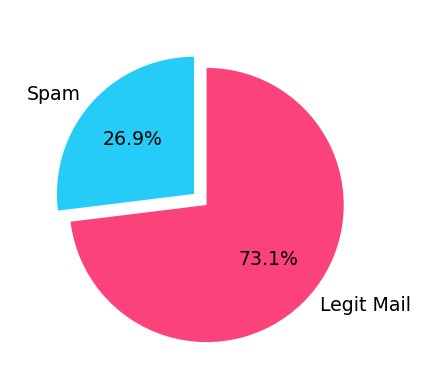

In [30]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

custom_colours=['#25CCF7', '#FC427B']
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle = 90,
       autopct='%1.1f%%',colors=custom_colours,explode=[0,0.122])
plt.show()

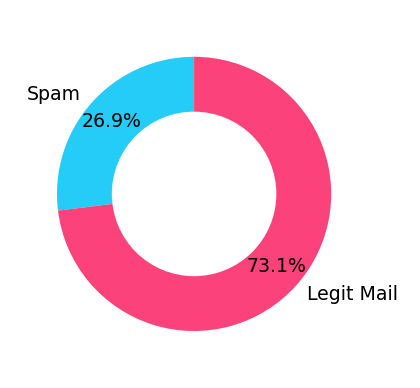

In [31]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

custom_colours=['#25CCF7', '#FC427B']
plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle = 90,
       autopct='%1.1f%%',colors=custom_colours, pctdistance=0.8)

#draw circle in the piechart
centre_circle = plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

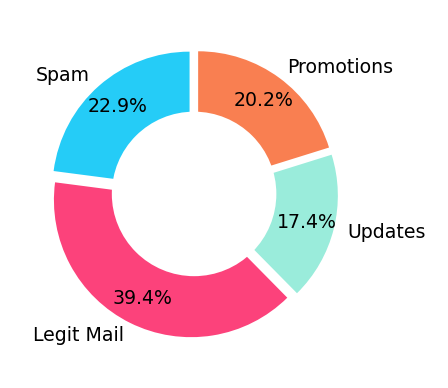

In [32]:
category_names = ['Spam', 'Legit Mail','Updates','Promotions']
sizes = [25, 43, 19, 22]
custom_colours=['#25CCF7', '#FC427B', '#9AECDB', '#F97F51']

offset = [0.05, 0.05, 0.05,0.05]

plt.figure(figsize=(2,2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle = 90,
         autopct='%1.1f%%',colors=custom_colours, pctdistance=0.8, explode=offset)

#draw circle in the piechart
centre_circle = plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(centre_circle)
plt.show()

# Natural Language Processing

## Text Pre-Processing

In [33]:
#converting to lower case #nltk for all nlp functions 

msg = 'All work an no play makes jack a dull boy.'
msg.lower()

'all work an no play makes jack a dull boy.'

## Downloading the NLTK Resourse(Tolkenizer & Stopwords)

In [34]:
#downloading package
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sajid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sajid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Removing Stop words

In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
type(stopwords.words('english'))

list

In [38]:
stop_words = set(stopwords.words('english'))

In [39]:
type(stop_words)

set

## Tokensing

In [40]:
msg = 'Salmon is a fish all fishes are not S almon'
word_tokenize(msg.lower())

['salmon', 'is', 'a', 'fish', 'all', 'fishes', 'are', 'not', 's', 'almon']

In [41]:
if 'this' in stop_words: 
    print('Fount it!')

Fount it!


In [42]:
if 'play' not in stop_words: 
    print('Not here!')
else:
    print('its here')

Not here!


In [43]:
msg = 'ALL works and no play makes jack a dull boy. To be or not to be.'
words = word_tokenize(msg.lower())

stop_words = set(stopwords.words('english'))




filtered_words = []
for word in words:
    if word not in stop_words:
        filtered_words.append(word)

print(filtered_words)

['works', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


## Word Stemming 

In [44]:
# fishing, fisher, fishlike = fish


In [45]:


msg = 'ALL works and no play makes jack a dull boy. To be or not to be. Nobody expects the Spanish Inquisition'
words = word_tokenize(msg.lower())

stop_words = set(stopwords.words('english'))

stemmer = SnowballStemmer('english')

filtered_words = []

for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)

print(filtered_words)


['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.', 'nobodi', 'expect', 'spanish', 'inquisit']


## Removing Punctuation

In [46]:
'p'.isalpha()

True

In [47]:
'?'.isalpha()

False

# Removing HTML tags from emails

In [48]:
data.at[2, 'MESSAGE']

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [49]:
#importing BeautifulSoup
#
soup = BeautifulSoup(data.at[2, 'MESSAGE'], 'html.parser')
print(soup.prettify())


1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417



In [50]:
#all the html tags are removed from the email
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

# Creating a Function for email processing

In [51]:
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
     
                  
    #converting to lower case and splits up the words
    
    words = word_tokenize(message.lower())
                  
    filtered_words = []
    
    for word in words:
        #removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
                  
    return filtered_words
    

In [52]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [92]:
def clean_msg_no_html_tags(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
     
        
    #remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
                  
    #converting to lower case and splits up the words
    
    words = word_tokenize(cleaned_text.lower())
                  
    filtered_words = []
    
    for word in words:
        #removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
#            filtered_words.append(word)
                  
    return filtered_words
    

In [54]:
clean_msg_no_html_tags(data.at[2, 'MESSAGE'])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

# Apply Cleaning and Tokenisation to all message 
  
### Slicing Dataframes and Series & Creating Subset

In [55]:
#selecting a particular value
data.iat[2,1]

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

In [56]:
data.iloc[0:5]

,CATEGORY,MESSAGE,FILE_NAME
DOC_ID,,,
0,1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",00001.7848dde101aa985090474a91ec93fcf0
1,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,1,##############################################...,00004.eac8de8d759b7e74154f142194282724
4,1,I thought you might like these:\n\n1) Slim Dow...,00005.57696a39d7d84318ce497886896bf90d


In [57]:
data.iloc[5:]

,CATEGORY,MESSAGE,FILE_NAME
DOC_ID,,,
5,1,A POWERHOUSE GIFTING PROGRAM You Don't Want To...,00006.5ab5620d3d7c6c0db76234556a16f6c1
6,1,Help wanted. We are a 14 year old fortune 500...,00007.d8521faf753ff9ee989122f6816f87d7
7,1,<html>\n\n<head>\n\n<title>ReliaQuote - Save U...,00008.dfd941deb10f5eed78b1594b131c9266
8,1,TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...,00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
9,1,"Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...",00010.445affef4c70feec58f9198cfbc22997
...,...,...,...
5191,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...,01396.61983fbe6ec43f55fd44e30fce24ffa6
5192,0,"> >-- be careful when using this one.) Also, t...",01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5193,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",01398.169b51731fe569f42169ae8f948ec676


In [58]:
data.MESSAGE.iloc[0:3]

DOC_ID
0    <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2    1) Fight The Risk of Cancer!\n\nhttp://www.adc...
Name: MESSAGE, dtype: object

In [59]:
first_emails = data.MESSAGE.iloc[0:3]

nested_list = first_emails.apply(clean_message)

In [60]:
#python list comprehension
first_list = [item for sublist in nested_list for item in sublist]

In [61]:
flat_list = []
for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)
        
len(flat_list)

321

In [62]:
first_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [63]:
%%time


#use apply() on all the messages in the dataframe
nested_list = data.MESSAGE.apply(clean_msg_no_html_tags)

Wall time: 1min


In [64]:
nested_list.head()

DOC_ID
0    [save, life, insur, spend, life, quot, save, g...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

In [65]:
nested_list.tail()

DOC_ID
5191    [http, bizarr, collect, stuf, anim, could, fet...
5192    [care, use, one, also, realli, cute, thing, ja...
5193    [sm, skip, montanaro, write, jeremi, put, anot...
5194    [mark, hammond, like, given, zodb, sound, attr...
5195    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

## using logic to slice Dataframe


In [66]:
data[data.CATEGORY == 0]

,CATEGORY,MESSAGE,FILE_NAME
DOC_ID,,,
3796,0,"Date: Tue, 20 Aug 2002 17:27:47 -05...",00001.1a31cc283af0060967a233d26548a6ce
3797,0,--==_Exmh_-199405358P\n\nContent-Type: text/pl...,00002.5a587ae61666c5aa097c8e866aedcc59
3798,0,--==_Exmh_-196335410P\n\nContent-Type: text/pl...,00003.19be8acd739ad589cd00d8425bac7115
3799,0,--==_Exmh_-195849857P\n\nContent-Type: text/pl...,00004.b2ed6c3c62bbdfab7683d60e214d1445
3800,0,--==_Exmh_31119591P\n\nContent-Type: text/plai...,00005.07b9d4aa9e6c596440295a5170111392
...,...,...,...
5191,0,http://news.bbc.co.uk/1/hi/england/2515127.stm...,01396.61983fbe6ec43f55fd44e30fce24ffa6
5192,0,"> >-- be careful when using this one.) Also, t...",01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5193,0,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",01398.169b51731fe569f42169ae8f948ec676


In [67]:
data[data.CATEGORY == 1].tail()

,CATEGORY,MESSAGE,FILE_NAME
DOC_ID,,,
3791,1,This is a multi-part message in MIME format.\n...,01397.f75f0dd0dd923faefa3e9cc5ecb8c906
3792,1,"Dear Subscriber,\n\n\n\nIf I could show you a ...",01398.8ca7045aae4184d56e8509dc5ad6d979
3793,1,****Mid-Summer Customer Appreciation SALE!****...,01399.2319643317e2c5193d574e40a71809c2
3794,1,ATTN:SIR/MADAN \n\n\n\n ...,01400.b444b69845db2fa0a4693ca04e6ac5c5
3795,1,,cmds


# data.CATEGORY.value_counts()

In [68]:
#spam mail
doc_ids_spam = data[data.CATEGORY == 1].index
#non-spam mail
doc_ids_ham = data[data.CATEGORY == 0].index

In [69]:
doc_ids_ham

Int64Index([3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805,
            ...
            5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5194, 5195],
           dtype='int64', name='DOC_ID', length=1400)

## Subsetting a series with an index

In [70]:
type(doc_ids_ham)


pandas.core.indexes.numeric.Int64Index

In [71]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [72]:
nested_list_ham.shape

(1400,)

In [73]:
nested_list_ham.tail()

DOC_ID
5191    [http, bizarr, collect, stuf, anim, could, fet...
5192    [care, use, one, also, realli, cute, thing, ja...
5193    [sm, skip, montanaro, write, jeremi, put, anot...
5194    [mark, hammond, like, given, zodb, sound, attr...
5195    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, dtype: object

In [74]:
nested_list_spam= nested_list.loc[doc_ids_spam]

In [75]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]

normal_words= pd.Series(flat_list_ham)

#total number of words in emails
normal_words.shape[0]

180669

In [76]:
#finding the unique  words
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]

normal_words= pd.Series(flat_list_ham).value_counts()

#total number of unique words in non 
normal_words.shape[0]

12700

In [77]:
#10 most common words in non-spam message
normal_words[:10]

http     3251
use      1509
list     1494
one      1035
mail     1017
user      952
linux     915
get       905
would     861
file      808
dtype: int64

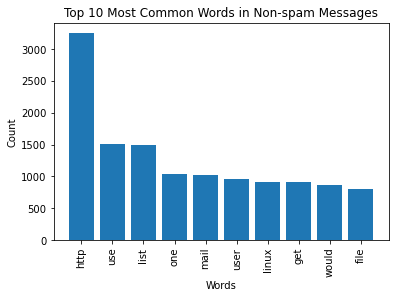

In [78]:
import matplotlib.pyplot as plt

# Top 10 words and their counts
words = ['http', 'use', 'list', 'one', 'mail', 'user', 'linux', 'get', 'would', 'file']
counts = [3251, 1509, 1494, 1035, 1017, 952, 915, 905, 861, 808]

# Create a list of x-coordinates for the bar plot
x = range(len(words))

# Create the bar plot
plt.bar(x, counts)

# Set the x-axis tick labels
plt.xticks(x, words, rotation='vertical')

# Set the axis labels
plt.xlabel('Words')
plt.ylabel('Count')

# Set the plot title
plt.title('Top 10 Most Common Words in Non-spam Messages')

# Display the plot
plt.show()


In [79]:
#finding the unique  words
flat_list_spam = [item for sublist in nested_list_ham for item in sublist]

unique_words= pd.Series(flat_list_spam).value_counts()

#total number of unique words in spam 
unique_words.shape[0]

12700

In [80]:
unique_words[:10]

http     3251
use      1509
list     1494
one      1035
mail     1017
user      952
linux     915
get       905
would     861
file      808
dtype: int64

# installing word cloud

In [81]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


# Generate Vocabulary & Dictionary

In [98]:
stemmed_nested_list = nested_list 
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

In [102]:
import pandas as pd

unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Num of unique words', unique_words.shape[0])

Num of unique words 20514


In [114]:
#challenge: create subset of the series called 'frequent_word' that only contains
#the most common 2500 words out of the total. Print out the top 10 words
vocab_size = 2500

In [109]:
frequent_words = unique_words[0:2500]
print('MOSt common words: \n' ,frequent_words[0:10])

MOSt common words: 
 http      9445
email     6769
list      5436
free      5340
get       4733
mail      4473
use       4281
receiv    4166
click     4146
one       4103
dtype: int64


In [110]:
type(frequent_words)

pandas.core.series.Series

# Create Vocabulary DataFrame with a WORD_ID

In [120]:


word_ids = list(range(0, vocab_size))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,http
1,email
2,list
3,free
4,get


# save the vocabulary as a CSV file

In [124]:
vocab.to_csv(word_id_file, index_label=df.index.name, header=vocab.VOCAB_WORD.name)


# Exercise: Checking if a Word is part of the Vocabulary

In [ ]:
#checking the particular word part of the vocabulary 
#machine
#learning
#data
#science
#NLP
#app
#development


In [129]:
any(vocab.VOCAB_WORD == 'data')

True

In [128]:
'data'in set(vocab.VOCAB_WORD)

True

# Finding the longest email

In [130]:
#for loop 
clean_email_lengths = []
for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))
    

In [131]:
print(clean_email_lengths)

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44, 55, 23, 44, 74, 64, 235, 47, 208, 36, 56, 223, 192, 0, 93, 14, 208, 44, 18, 64, 95, 312, 56, 141, 72, 55, 1066, 48, 139, 2, 90, 78, 4, 47, 70, 44, 75, 38, 12, 38, 63, 47, 51, 71, 80, 25, 275, 36, 63, 19, 18, 14, 40, 57, 18, 77, 28, 102, 41, 226, 68, 120, 5, 52, 0, 40, 40, 208, 0, 40, 146, 62, 114, 64, 253, 1221, 49, 0, 65, 52, 145, 15, 0, 90, 70, 2, 198, 50, 50, 50, 214, 119, 43, 80, 44, 319, 243, 9, 36, 98, 26, 52, 333, 47, 42, 0, 38, 78, 97, 79, 55, 102, 34, 70, 55, 18, 129, 50, 0, 39, 74, 43, 72, 47, 80, 0, 28, 223, 97, 0, 58, 84, 214, 75, 47, 18, 104, 20, 114, 110, 187, 6, 40, 54, 79, 276, 110, 208, 6, 489, 62, 17, 175, 79, 47, 74, 82, 255, 33, 218, 38, 36, 110, 93, 61, 55, 41, 108, 80, 84, 0, 52, 1390, 108, 97, 25, 185, 1, 119, 255, 28, 137, 195, 177, 0, 98, 109, 1465, 0, 108, 150, 113, 38, 153, 38, 42, 0, 0, 383, 188, 77, 330, 14, 92, 92, 104, 372, 187, 241, 143, 254, 14, 98, 135, 223, 65, 90, 226, 217, 129, 38, 94, 204, 255, 215, 146,

In [132]:
print('Email position in the list (and the data dataframe)', np.argmax(clean_email_lengths))

Email position in the list (and the data dataframe) 5175


In [133]:
 stemmed_nested_list[5175]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [134]:
#row name
data.at[np.argmax(clean_email_lengths),'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp